In [29]:
import pandas as pd


In [30]:
results = pd.read_csv("results.csv", na_values="\\N")
results['fastestLapTime']

0        1:27.452
1        1:27.739
2        1:28.090
3        1:28.603
4        1:27.418
           ...   
25835    1:29.833
25836    1:31.158
25837    1:29.788
25838    1:30.309
25839    1:30.579
Name: fastestLapTime, Length: 25840, dtype: object

In [31]:
# Question 1
top_5_finishers = results.query('position <= 5')
top_5_finishers.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


In [32]:
# Question 2
results['time'] = pd.to_timedelta(results['time'], errors='coerce')


median_race_time = results['time'].median()

results['time'] = results['time'].fillna(median_race_time)

results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,0 days 01:34:50.616000,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,0 days 01:38:30.175000,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,0 days 01:38:30.175000,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,0 days 01:38:30.175000,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,0 days 01:38:30.175000,5708630.0,43.0,1.0,1:27.418,218.385,1


In [33]:
# Question 3
total_points_by_driver = results.groupby('driverId')['points'].agg(TotalPoints='sum').reset_index()

total_points_by_driver.head()

,driverId,TotalPoints
0,1,4396.5
1,2,259.0
2,3,1594.5
3,4,2061.0
4,5,105.0


In [34]:
# Question 4

first_place_finishes = results.query('position == 1')

constructor_wins = first_place_finishes.groupby('constructorId').agg(NumberOfWins=('position', 'count')).reset_index()

top_constructor = constructor_wins.loc[constructor_wins['NumberOfWins'].idxmax()]

top_constructor.head()

constructorId      6
NumberOfWins     243
Name: 5, dtype: int64

In [35]:
# Question 5
average_fastest_lap_speed_by_race = results.groupby('raceId')['fastestLapSpeed'].agg(AverageFastestLapSpeed = 'mean').reset_index()
average_fastest_lap_speed_by_race.head()

,raceId,AverageFastestLapSpeed
0,1,214.918895
1,2,202.320556
2,3,171.060450
3,4,204.150650
4,5,199.641562


In [36]:
# Question 6

average_position_by_driver = results.groupby('driverId')['positionOrder'].agg(AveragePosition='mean').reset_index()

top_3_drivers = average_position_by_driver.nsmallest(3, 'AveragePosition')

top_3_drivers

,driverId,AveragePosition
590,591,2.0
801,802,2.0
765,766,3.5


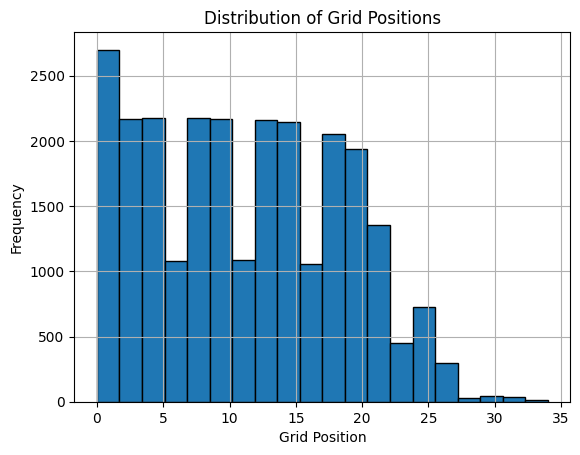

In [37]:
import matplotlib.pyplot as plt

# Create a histogram of the 'grid' positions
results['grid'].hist(bins=20, edgecolor='black')

# Customise the histogram with titles and labels
plt.title('Distribution of Grid Positions')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [38]:
# Question 8

grouped_results = results.groupby('driverId')

finished_all_races = grouped_results.filter(lambda x: (x['statusId'] == 1).all())

drivers_finished_all_races = finished_all_races['driverId'].unique()

drivers_finished_all_races.tolist()

[515, 557, 591, 674, 727, 802, 851, 856]

In [45]:
# Question 9
df = results[['driverId', 'fastestLapTime']].dropna()

fastest_laps_by_driver = df.groupby('driverId').agg(
    fastestLapTime=('fastestLapTime', 'min')
).reset_index()

fastest_laps_by_driver['fastestLapTime'] = fastest_laps_by_driver['fastestLapTime'].astype(str)

fastest_laps_by_driver['fastestLapTime'] = fastest_laps_by_driver['fastestLapTime'].apply(lambda x: '00:' + x if ':' in x and x.count(':') == 1 else x)

fastest_laps_by_driver['fastestLapTime'] = pd.to_timedelta(fastest_laps_by_driver['fastestLapTime'], errors='coerce')

fastest_laps_by_driver.head()


,driverId,fastestLapTime
0,1,0 days 00:01:06.719000
1,2,0 days 00:01:13.095000
2,3,0 days 00:01:08.491000
3,4,0 days 00:01:08.405000
4,5,0 days 00:01:13.998000


In [40]:
# Question 10

results['grid'] = pd.to_numeric(results['grid'], errors='coerce')
results['position'] = pd.to_numeric(results['position'], errors='coerce')

correlation = results[['grid', 'position']].dropna().corr().iloc[0, 1]
correlation

0.6432946507834085